In [47]:
%pylab inline
import pylab as pl
import pandas as pd
import numpy as np
import json
from scipy import stats


import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


TIME SERIES ANALYSIS

Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


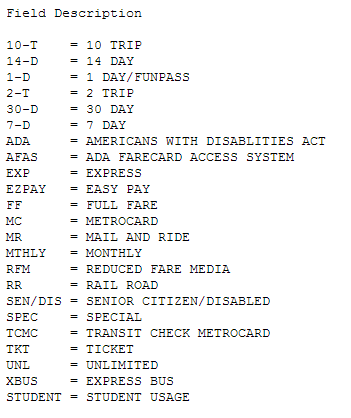

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 1: 
##Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
##Identify it and figure out what it is due to.


#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


#EXTRA CREDIT: Cluster. 
##Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
##Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

##i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

##removing empty light curves
tots = tots[tots.std(1)>0]

##with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

##and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

##then you can run:

km.fit(vals)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [10]:
np.zeros((2, 3, 4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [15]:
mta = np.load('MTA_Fare.npy').astype('float')

In [16]:
#after reading the datacube you should see:
mta.shape


(600, 23, 194)

ride types list

In [17]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [20]:
mta[mta == -1] = np.nan

In [21]:
dates = pd.date_range('20100521', periods=194, freq='W')
print dates

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN')


# Task 1

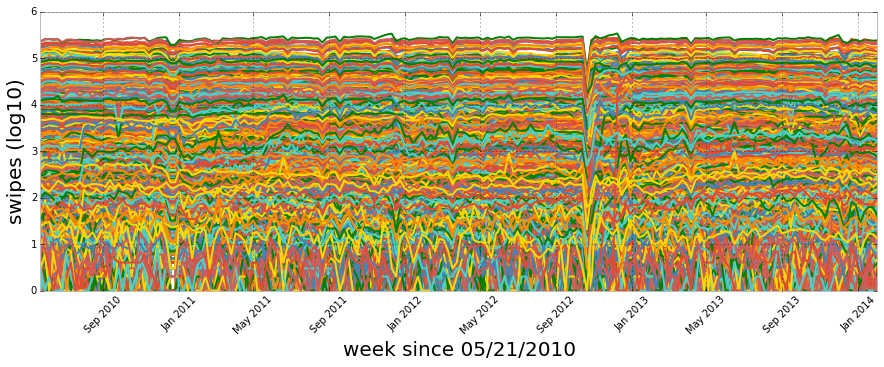

In [25]:
Q = figure(figsize=(15,5))
for i in range (0, 600):
    for j in range (0, 23):
        plt.plot(dates, np.log10(mta[i][j]))
plt.xticks(rotation=45)
plt.xlabel("week since 05/21/2010", fontsize = 20)
plt.ylabel("swipes (log10)", fontsize = 20)

In [9]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [29]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)
mta_allsum_1 = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum_2 = np.nansum(mta, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(600, 194)
(600, 194)


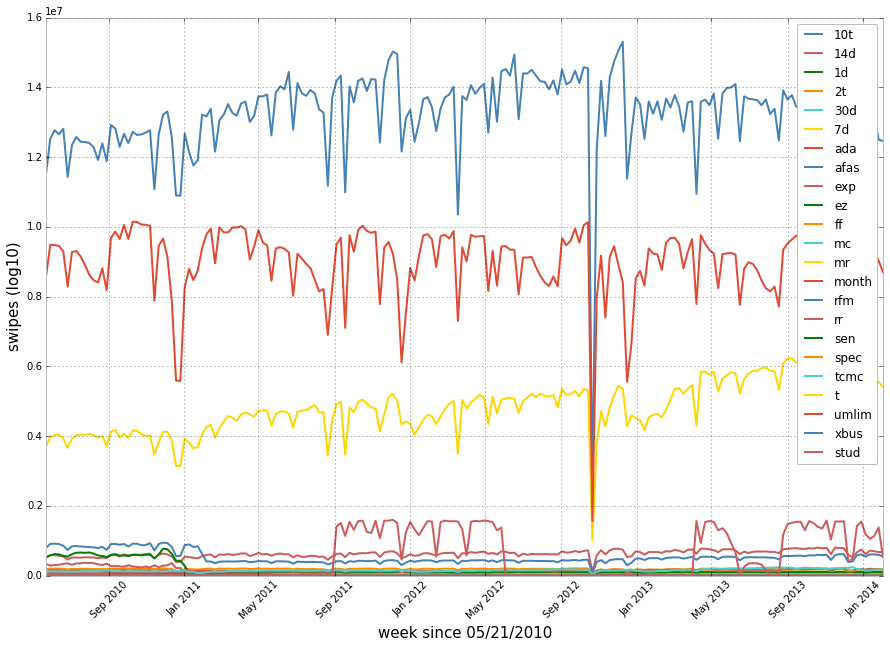

In [60]:
Q1 = figure(figsize = (15,10))
for i in range(0, 23):
    plt.plot(dates, mta_allsum_1[i])
plt.xticks(rotation=45)
plt.legend(ridetype)
plt.xlabel("week since 05/21/2010", fontsize = 15)
plt.ylabel("swipes (log10)", fontsize = 15)

[230683.67751465447, 8078.260629675424]


In [113]:
data = pd.DataFrame(data=mta_allsum_1,index=ridetype,columns=dates).dropna().transpose()

In [114]:
mta_allsum_rt = data.sum(axis = 1)
thresholds = [mta_allsum_rt.mean() + 3*mta_allsum_rt.std(), 
              mta_allsum_rt.mean() - 3*mta_allsum_rt.std()]
print thresholds

[38756392.57537587, 20806307.16689217]


In [115]:
print mta_allsum_rt[(mta_allsum_rt < thresholds[1]) | (mta_allsum_rt > thresholds[0])]

2012-10-21    5218686
Freq: W-SUN, dtype: float64


# Comment:


Based on the calculation above, the prominent event happened on the week of 2012-10-21. It might happened due to Hurrican Sandy which drived the subway stations closed.

# Task 2

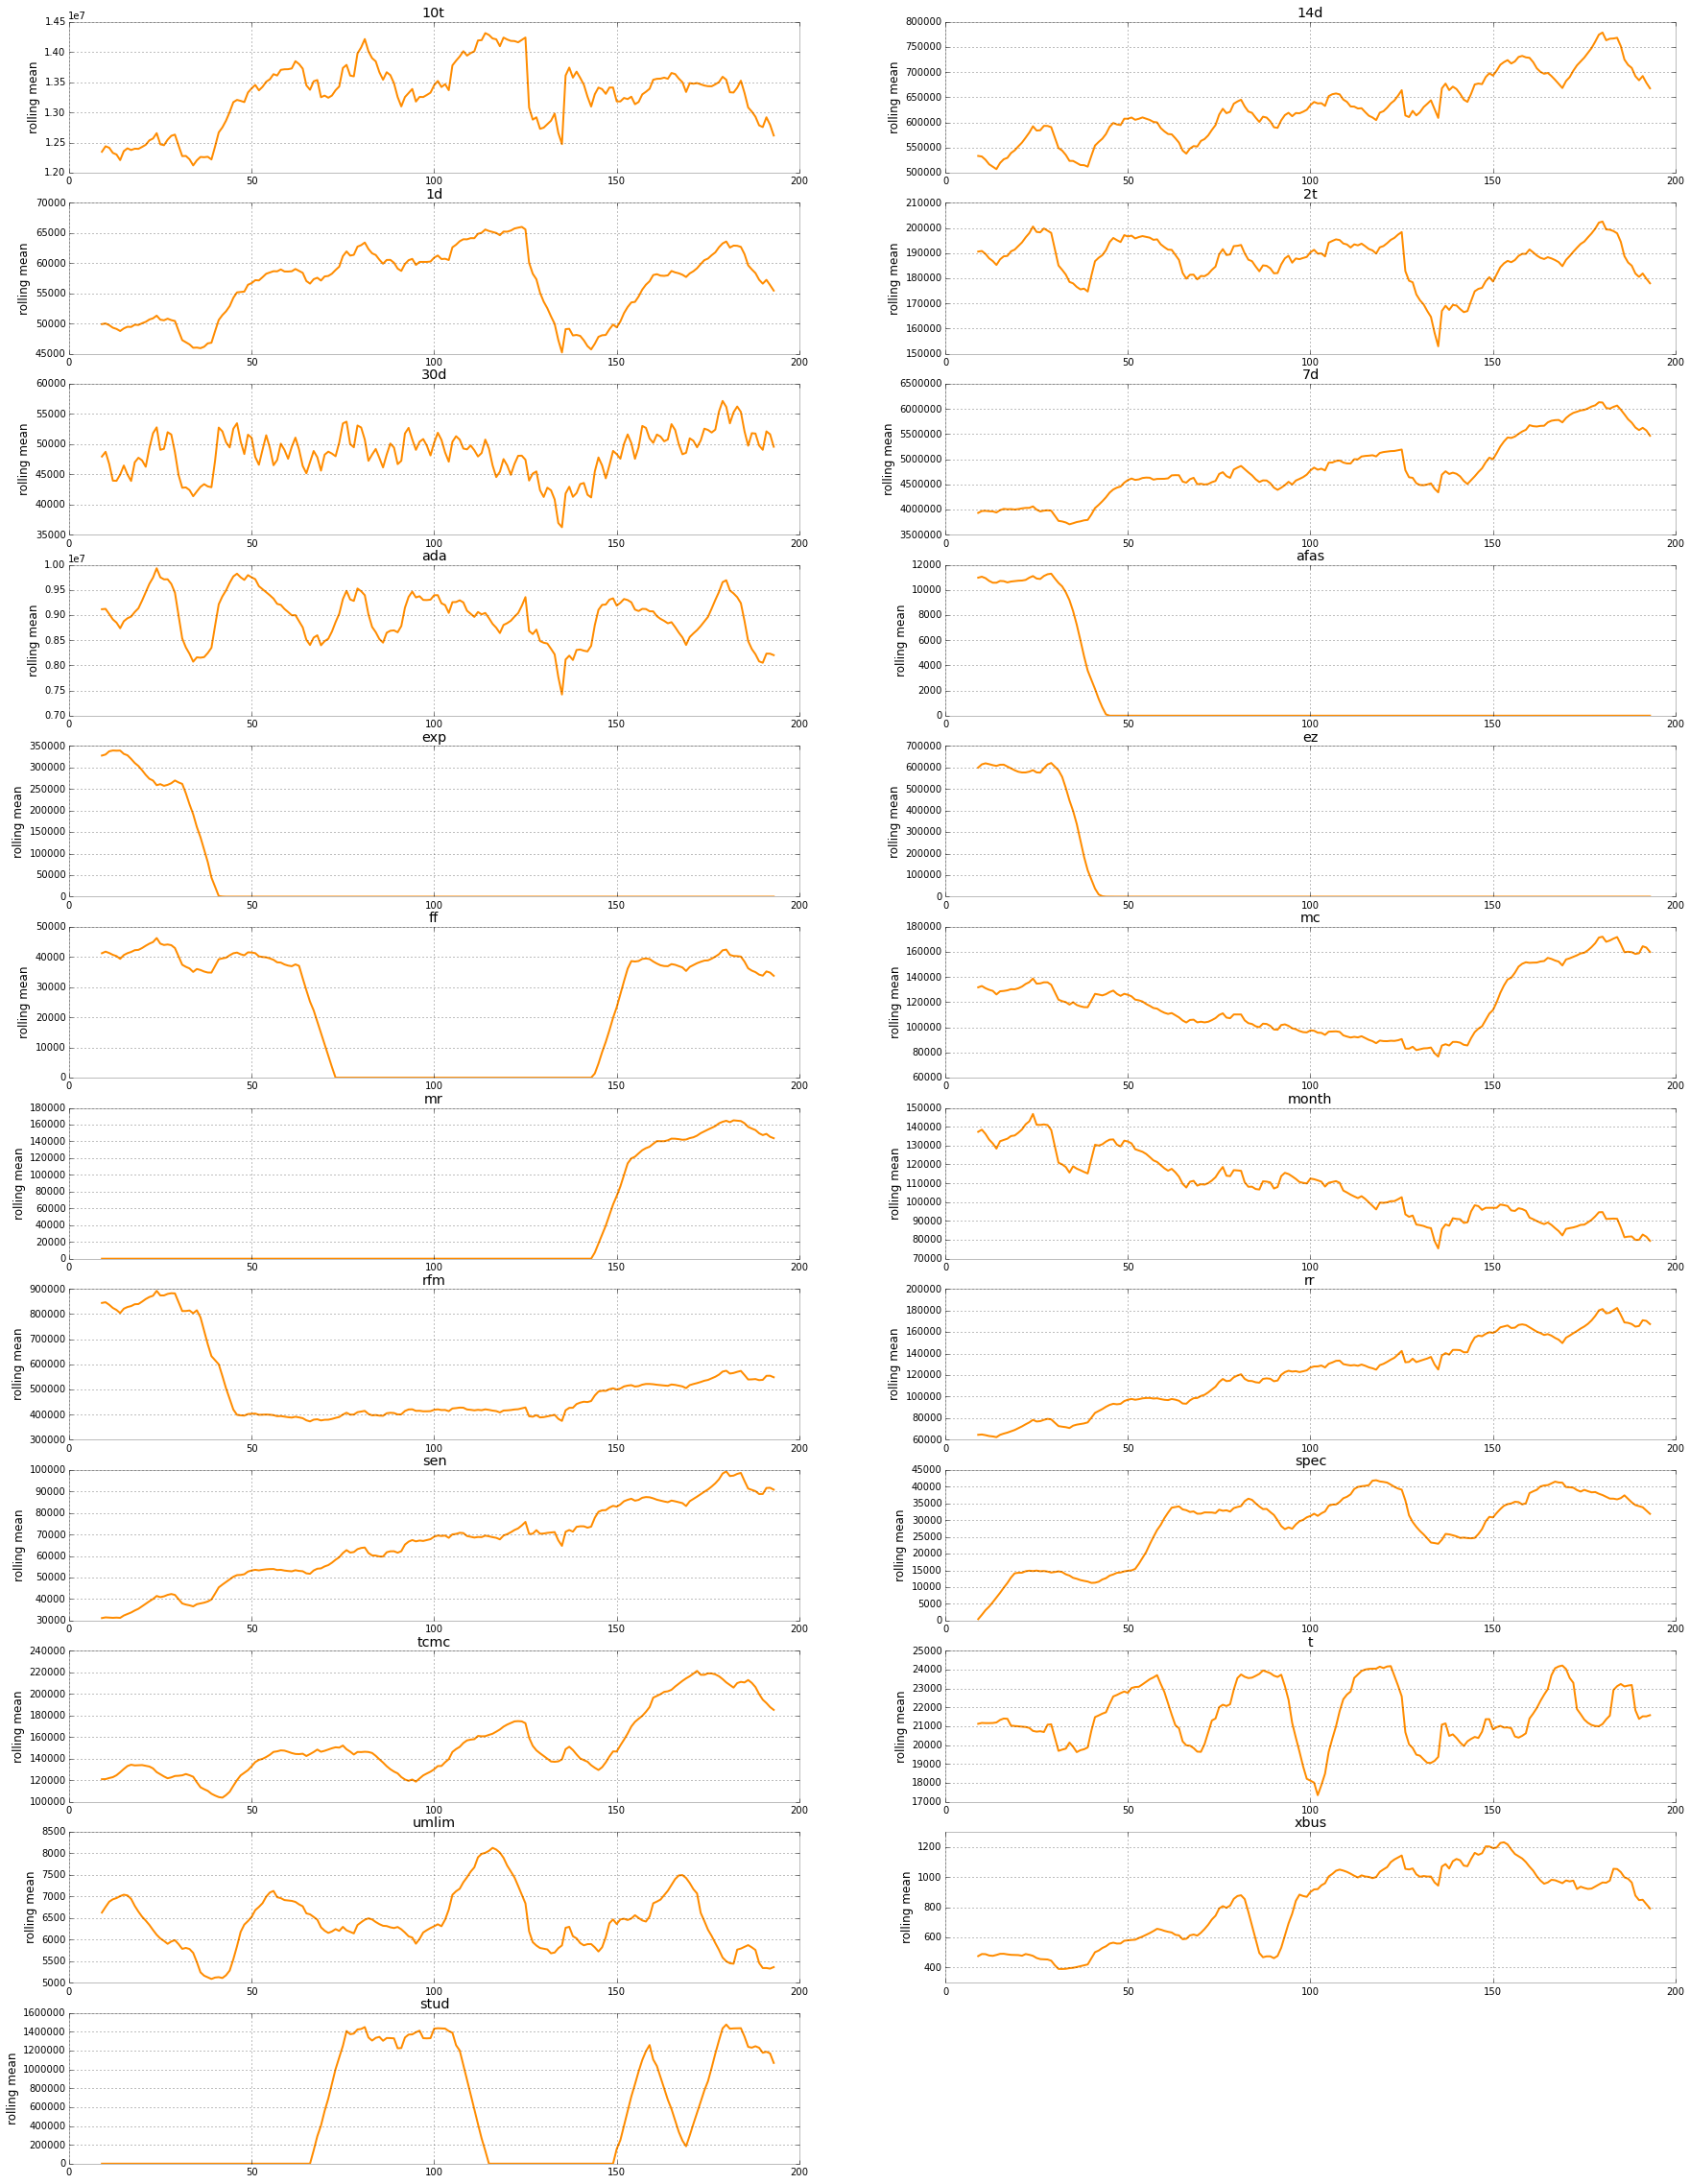

In [127]:
weeks = np.arange(194)
rollingmean = pd.rolling_mean(stadf[stadf.columns[:]], 10)
rollingmean.index = weeks


fig = plt.figure(figsize = (30,40))
for i in range(23):
    fig.add_subplot(12,2,i+1)

    plt.ylabel("rolling mean")
    plt.plot(weeks, rollmean.iloc[:,i],color = '#ff8c00')
    plt.title(ridetype[i])


In [124]:
flux_ratio = np.zeros(23)
std = np.zeros(23)

j=0
for i in ridetype:
    rolling_mean = pd.rolling_mean(data[i], 10).dropna()
    #Once I drop nan, 184 is the last one has value 
    flux_ratio[j] = rolling_mean[0]/rolling_mean[184]
    std[j] = np.nanstd(rolling_mean)
    j = j+1
for i in range(23):
    print   ridetype[i], flux_ratio[i], std[i]

10t 0.978667087302 546777.616992
14d 0.79868054602 64593.9013999
1d 0.899810476622 5767.41249418
2t 1.07088927164 8828.00385607
30d 0.967317176485 3624.08852559
7d 0.719555117345 631955.017784
ada 1.11130702032 473487.373171
afas 4774.47826087 3794.92677395
exp 93571.3428571 101444.891854
ez 665798.555556 206370.776156
ff 1.22129628533 18800.9465287
mc 0.824035088267 25371.3235538
mr 4.03470963308e-05 61154.07344
month 1.72794422105 17282.8338522
rfm 1.53938888675 153165.983867
rr 0.385659649203 33309.1353549
sen 0.343713862169 18139.76186
spec 0.0142485908332 10350.7975728
tcmc 0.652626042706 30841.4542922
t 0.978867204328 1570.54061471
umlim 1.23599634403 681.416736526
xbus 0.601566447701 252.041044476
stud 0.0 587158.97218


# Comment:

As shown above,'14d' '7d' 'rr' 'sen' are steadily increasing and 'month' are steadily drecreasing.  

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

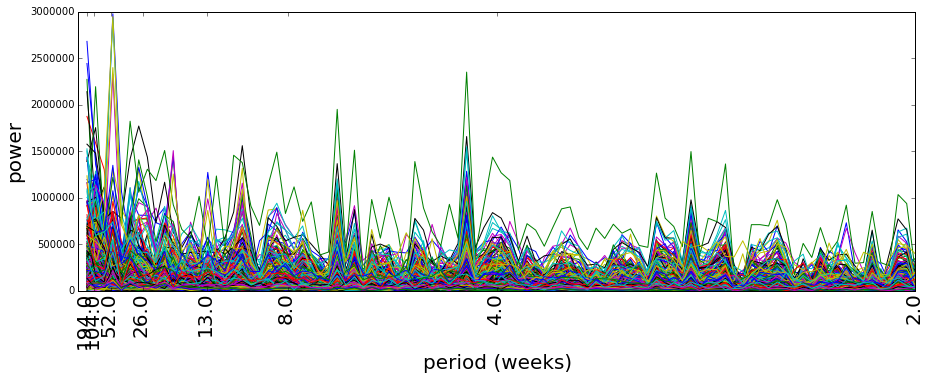

In [51]:
#this is a "power spectrum": the plot of the absolute value of the fourier transform. 
#I changed the xtick labels from frequecy (1/week) to period (in weeks)
#to facilitate the visual identification of the 1-year period peak
#(notice however that np.fft.rfftfreq(N, d)  returns frequency)

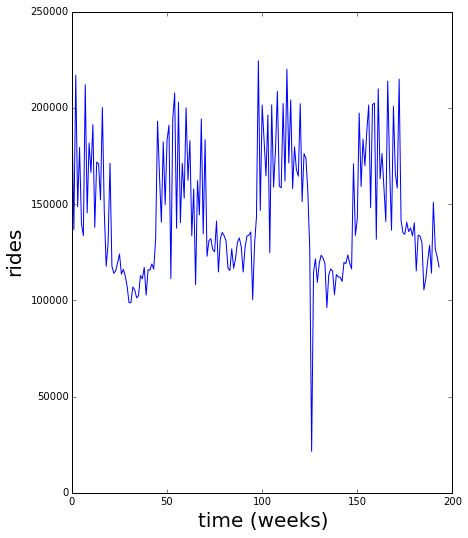

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space